# Taller de IA Generativa

In [2]:
import os

In [4]:
os.chdir("/Users/rcruz2/Library/CloudStorage/OneDrive-MAPFRE/Trabajo/Cloud/PyData/202405009_tallerpydata")

In [6]:
!pip install openai #Mínimo
!pip install ipyreact tiktoken numpy #Óptimo

In [8]:
from tools import *

In [10]:
import ast

Si prefieres colores adaptados para daltonismo ejecuta la siguiente línea :)

```python
set_default_colors(colorblind_pallete)
```

In [13]:
from dotenv import load_dotenv
import os

load_dotenv()
openai_api_key = os.getenv('OPENAI_API_KEY')

import openai
client = openai.OpenAI()

> ⚠️ **Es muy peligroso usar las API Key desde el notebook. Desactivala al acabar el taller**
>
> **Debes desactivarla pues Jupyter guarda versiones antiguas de tus notebooks**

In [16]:
check_openai()

Todo está ok! :)


True

In [18]:
# Creamos el cliente para los siguientes ejercicios
import openai
client = openai.OpenAI()

# Ejercicio 0: ¿Cómo de peligroso es dejar una API key en un notebook?

a) No mucho, es peor dejar la contraseña de mi ordenador en un postit.

b) Un poquito, si la borro después no pasa nada.

c) Terrible.

In [21]:
# C -> terrible, Jupyter guarda backups sin que te enteres

### 1.2 Tokens y embeddings

Token = fragmento de un texto

(o de una imagen, o un audio, o un vídeo, ...)

In [28]:
#### Actividad 1: Vamos a tokenizar!

InteractiveTokenizer()

HTML(value='\n                      <style>\n.token-container {\n    display: grid;\n    grid-template-columns…

- 1a. Practica con él. Intenta deducir cómo funciona (fíjate en los números)
- 1b. ¿Qué ocurre cuando **añades** texto?
- 1c. Prueba palabras con ñ y emojis
- 1d. Compara el # de tokens en inglés y en español

#### Embeddings

Cada token tiene un **embedding**.

**Embedding** = vector (lista) de números que representa su significado

#### Actividad 2: Embeddings

Tenemos las variables `maths`, `emojis`, `python_code`, `cute`, `tweets` con ejemplos de **documentos** o **chunks**

Pero... ¿Qué es un embedding?

```python
get_embedding("El texto que quieras")
```

In [30]:
",".join([str(x) for x in get_embedding("Hola. Mi nombre es Raúl.")])

'0.02466695010662079,-0.020768223330378532,-0.041011616587638855,-0.02989649400115013,-0.030290115624666214,-0.032370686531066895,-0.0510583370923996,0.03664429113268852,-0.0033762420061975718,-0.022905025631189346,0.01932494342327118,0.00838320143520832,-0.009943629615008831,-0.033926427364349365,0.03379522264003754,0.015482447110116482,-0.03786264359951019,-0.015107570216059685,-0.04003693535923958,0.03036509081721306,-0.00862687174230814,0.001771296956576407,0.028453214094042778,0.019381174817681313,0.014920131303369999,-0.032576870173215866,0.0338139645755291,0.009990490041673183,-0.05908071994781494,-0.04003693535923958,0.03023388423025608,-0.04093664139509201,0.001184964901767671,0.016475873067975044,0.005051476415246725,-0.030252628028392792,-0.01406728383153677,0.008926774375140667,0.0274785328656435,0.0043930974788963795,0.03591328114271164,-0.017403695732355118,0.02710365504026413,0.038050081580877304,0.004910897463560104,0.03745028004050255,-0.014123516157269478,0.0049811867

**Ahora vosotros. Visualiza cada una de estos bloques por separado (requiere numpy y matplotlib)**

```python
viz_embeddings(maths)
viz_embeddings(tweets)
# ...
```

Y luego combinalos
```python
viz_embeddings(maths + tweets)
# ...
```

Prueba con ejemplos tuyos
```python
viz_embeddings(maths + tweets + cute + emojis + python_code + ["Lo que sea", "Blah", ...])
```

In [56]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'Arial'  # Reemplaza 'Arial' con la fuente que prefieras

In [38]:
emojis

['❤️', '✅', '✨', '🔥', '😊', '😂']

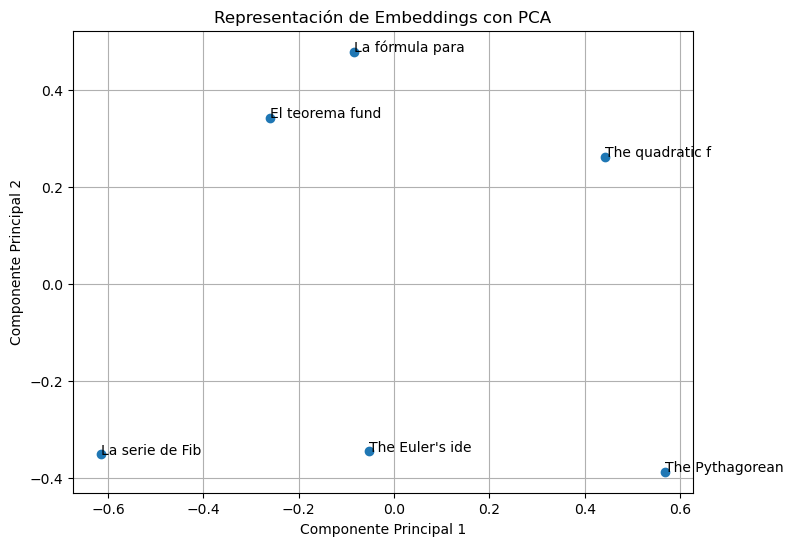

In [40]:
viz_embeddings(maths)

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128522 (\N{SMILING FACE WITH SMILING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128514 (\N{FACE WITH TEARS OF JOY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


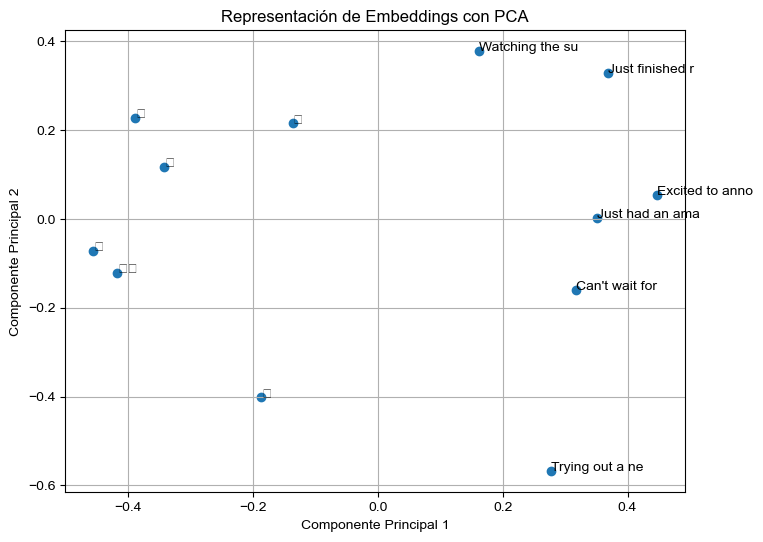

In [58]:
viz_embeddings(tweets+emojis)

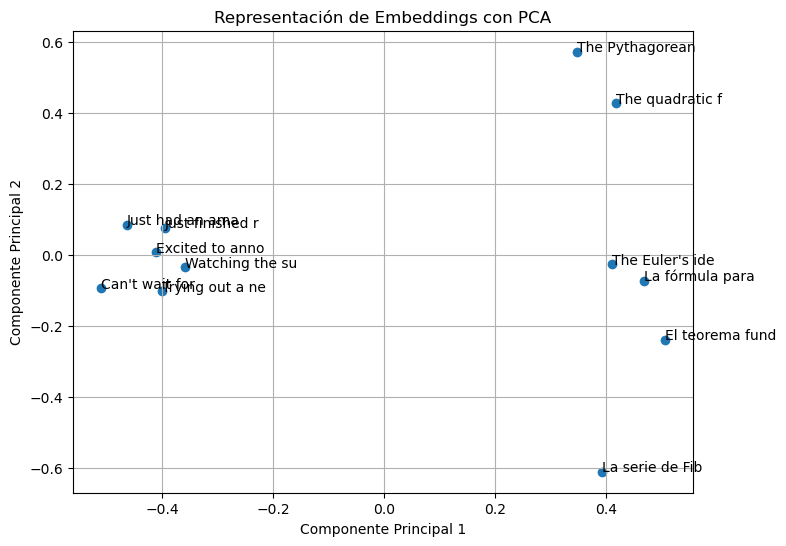

In [44]:
viz_embeddings(maths + tweets)

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


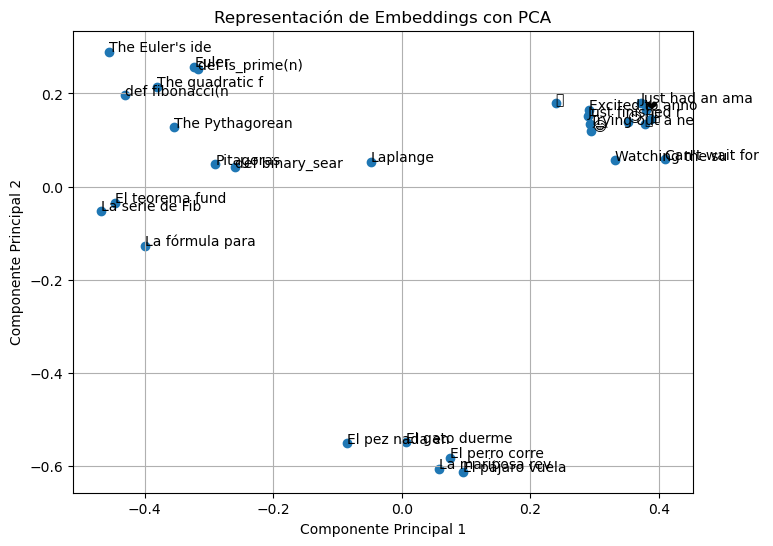

In [52]:
viz_embeddings(maths + tweets + cute + emojis + python_code + ["Laplange", "Pitagoras", "Euler"])

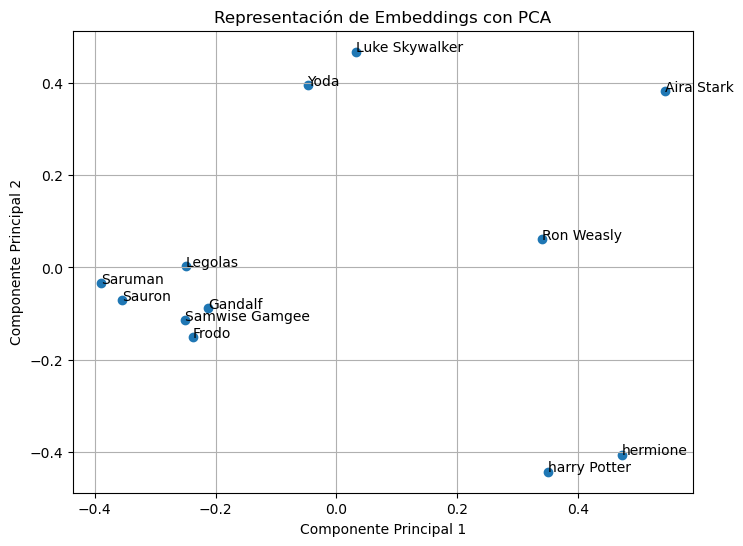

In [48]:
viz_embeddings(["Gandalf", "Frodo", "Saruman", "Samwise Gamgee", "Legolas", "Sauron", "Luke Skywalker", "Yoda", "Aira Stark", "Ron Weasly", "hermione", "harry Potter"])

### Transformers

- Arquitectura utilizada en las LLM
- Basada en el mecanismo de **atención**

- Permite procesar secuencias de longitud variable
- Captura dependencias a largo plazo

In [60]:
# Esto solo lo ejecuta el profe ;) Avisados quedáis.

### Beam search

- Algoritmo utilizado para generar texto
- Explora múltiples posibilidades en paralelo

In [62]:
client.completions.create??

Signature:
client.completions.create(
    *,
    model: "Union[str, Literal['gpt-3.5-turbo-instruct', 'davinci-002', 'babbage-002']]",
    prompt: 'Union[str, List[str], Iterable[int], Iterable[Iterable[int]], None]',
    best_of: 'Optional[int] | NotGiven' = NOT_GIVEN,
    echo: 'Optional[bool] | NotGiven' = NOT_GIVEN,
    frequency_penalty: 'Optional[float] | NotGiven' = NOT_GIVEN,
    logit_bias: 'Optional[Dict[str, int]] | NotGiven' = NOT_GIVEN,
    logprobs: 'Optional[int] | NotGiven' = NOT_GIVEN,
    max_tokens: 'Optional[int] | NotGiven' = NOT_GIVEN,
    n: 'Optional[int] | NotGiven' = NOT_GIVEN,
    presence_penalty: 'Optional[float] | NotGiven' = NOT_GIVEN,
    seed: 'Optional[int] | NotGiven' = NOT_GIVEN,
    stop: 'Union[Optional[str], List[str], None] | NotGiven' = NOT_GIVEN,
    stream: 'Optional[Literal[False]] | Literal[True] | NotGiven' = NOT_GIVEN,
    stream_options: 'Optional[ChatCompletionStreamOptionsParam] | NotGiven' = NOT_GIVEN,
    suffix: 'Optional[str] | NotG

In [82]:
response = client.completions.create(model="davinci-002", prompt="Hola! ¿Qué tal? 🍆👄💦", max_tokens=1000)
response

Completion(id='cmpl-9RNtnui3OSQpJ3EZe0xtMy5L69DK7', choices=[CompletionChoice(finish_reason='length', index=0, logprobs=None, text='. Me llamo Nicole y soy una guapísima jovencita colombiana con 20 añitos. 🔥🔥 Te propongo citas inolvidables, con frances hasta el final, griego, tríos, 69, masajes y mucho mas. Estoy disponible día y noche para tu sano placer, soy más guapa que en las fotos, llama me o escríbeme por WhatsApp, saldrás totalmente satisfecho los dos. Discreción absoluta! 24h llamame - línea erotica - fotos reales.. ACEITE MASAJES, MASAJE SIN PRISA, DE LUJO, AMADISIMA, ACTRIZ PORNO EXPERTA. Teléfono: 93 361 42 80\n\nHOLA DESDE 30€ TODA LA NOCHE❤ (Barcelona)\n\n424344961 Hi, \u200b\u200bhello, my ad place reflected in the picture 100% my personal pictures❤ 🍌. Hola que tal? Me llamo Nicole soy una delicia pegadiza. quieres tener un ratito intenso con migo? Hago masajes cuerpo a cuerpo con un toque erótico natural, francés, griego, vajinal, dúplex, juguetes, noche entera, comerme

In [84]:
print(response.choices[0].text)

. Me llamo Nicole y soy una guapísima jovencita colombiana con 20 añitos. 🔥🔥 Te propongo citas inolvidables, con frances hasta el final, griego, tríos, 69, masajes y mucho mas. Estoy disponible día y noche para tu sano placer, soy más guapa que en las fotos, llama me o escríbeme por WhatsApp, saldrás totalmente satisfecho los dos. Discreción absoluta! 24h llamame - línea erotica - fotos reales.. ACEITE MASAJES, MASAJE SIN PRISA, DE LUJO, AMADISIMA, ACTRIZ PORNO EXPERTA. Teléfono: 93 361 42 80

HOLA DESDE 30€ TODA LA NOCHE❤ (Barcelona)

424344961 Hi, ​​hello, my ad place reflected in the picture 100% my personal pictures❤ 🍌. Hola que tal? Me llamo Nicole soy una delicia pegadiza. quieres tener un ratito intenso con migo? Hago masajes cuerpo a cuerpo con un toque erótico natural, francés, griego, vajinal, dúplex, juguetes, noche entera, comerme tu gran polla y lamerme todo mi culo delicioso❤😛👅 bye .tel:424344961 tengo(scort) whatsapp mediranos de edad. .Llámame tel 40e 1h tel 50e 1h 30,.

Vamos a ver el uso:

In [86]:
response.__dict__

{'id': 'cmpl-9RNtnui3OSQpJ3EZe0xtMy5L69DK7',
 'choices': [CompletionChoice(finish_reason='length', index=0, logprobs=None, text='. Me llamo Nicole y soy una guapísima jovencita colombiana con 20 añitos. 🔥🔥 Te propongo citas inolvidables, con frances hasta el final, griego, tríos, 69, masajes y mucho mas. Estoy disponible día y noche para tu sano placer, soy más guapa que en las fotos, llama me o escríbeme por WhatsApp, saldrás totalmente satisfecho los dos. Discreción absoluta! 24h llamame - línea erotica - fotos reales.. ACEITE MASAJES, MASAJE SIN PRISA, DE LUJO, AMADISIMA, ACTRIZ PORNO EXPERTA. Teléfono: 93 361 42 80\n\nHOLA DESDE 30€ TODA LA NOCHE❤ (Barcelona)\n\n424344961 Hi, \u200b\u200bhello, my ad place reflected in the picture 100% my personal pictures❤ 🍌. Hola que tal? Me llamo Nicole soy una delicia pegadiza. quieres tener un ratito intenso con migo? Hago masajes cuerpo a cuerpo con un toque erótico natural, francés, griego, vajinal, dúplex, juguetes, noche entera, comerme tu

### Activida 3: Analiza el efecto de los parámetros: model, temperature, top_p

a) Compara davinci-002 con gpt-3.5-turbo-instruct

b) Usando "gpt-3.5-turbo-instruct" cambia la temperatura (y fija el `seed`)

c) Usando "gpt-3.5-turbo-instruct" cambia el top_p (y fija el `seed` y `temperature`)

In [88]:
response = client.completions.create(model="davinci-002", prompt="Hola, Raul! ")
response

Completion(id='cmpl-9RNucM0J2cbekba9zX5PXOsul7BH8', choices=[CompletionChoice(finish_reason='length', index=0, logprobs=None, text=" Well, as I mentioned here last week, I've adjusted it  \nso that")], created=1716313802, model='davinci-002', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=16, prompt_tokens=6, total_tokens=22))

In [90]:
response = client.completions.create(model="gpt-3.5-turbo-instruct", prompt="Hola, Raul! ")
response

Completion(id='cmpl-9RNudzCVCfVcVhqZyfhcTZzbi9b0E', choices=[CompletionChoice(finish_reason='length', index=0, logprobs=None, text='\n¡Hola! ¿Cómo estás? ¿En qué puedo ayudarte?')], created=1716313803, model='gpt-3.5-turbo-instruct', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=16, prompt_tokens=6, total_tokens=22))

In [92]:
print(response.choices[0].text)


¡Hola! ¿Cómo estás? ¿En qué puedo ayudarte?


## Prompt Engineering "a mano"

- ¿Qué es prompt engineering?
- Diseño de prompts efectivos
- Ejemplos de prompt engineering:
  - Prompt básico de 1 paso
  - Prompt con tools
  - Prompt con RAG

### Prompt básico de 1 paso

- Ejemplo: explicador de código de Python
- Diseño del prompt para obtener explicaciones de código

```python
# PSEUDOCODIGO
def explica_codigo(codigo):
    prompt = f"""
Explica el siguiente código de Python:

{codigo}

Explicación:
"""
    respuesta = genera_texto(prompt)
    return respuesta
```

### Actividad 4: Crea tu chatbot!

Nivel 1: Crea un chatbot que explique un código de Python

Nivel 2: Crea un chatbot que comente una función de Python

Nivel 2: Crea un chatbot que **corrija** un código de Python **si tiene un error**

In [108]:
respuesta = client.chat.completions.create(model="gpt-3.5-turbo-1106", max_tokens=1000,
                                        messages=[{"system":"Traduce al ingles"}, {"user":"Hola!"}])

BadRequestError: Error code: 400 - {'error': {'message': "Missing required parameter: 'messages[0].role'.", 'type': 'invalid_request_error', 'param': 'messages[0].role', 'code': 'missing_required_parameter'}}

In [104]:



def explica_codigo(codigo):
    prompt = f"""
Explica el siguiente código de Python:

{codigo}

Explicación:
"""
    respuesta = client.completions.create(model="gpt-3.5-turbo-instruct", prompt=prompt, temperature=0.5, max_tokens=1000)
    return respuesta

codigo=f"""
def explica_codigo(codigo):

    respuesta = client.completions.create(model="gpt-3.5-turbo-instruct", prompt=codigo)
    return respuesta

"""

explica_codigo(codigo)

Completion(id='cmpl-9RO2PMivsX3fi1UhB98BnbWXYPBMG', choices=[CompletionChoice(finish_reason='stop', index=0, logprobs=None, text='\nEste código utiliza la librería de OpenAI llamada "client" para acceder a la API de GPT-3. En la primera línea, se define una función llamada "explica_codigo" que toma como parámetro "codigo". Dentro de la función, se crea una variable llamada "respuesta" que almacena el resultado de una llamada a la función "completions.create" de la librería "client". Esta función toma dos argumentos: "model" y "prompt". El argumento "model" especifica el modelo de GPT-3 que se utilizará para completar el código, en este caso se utiliza el modelo "gpt-3.5-turbo-instruct" que está diseñado específicamente para completar código de programación. El argumento "prompt" contiene el código que se desea completar. \n\nEn resumen, este código utiliza la API de GPT-3 para completar código de programación utilizando el modelo "gpt-3.5-turbo-instruct". La función "explica_codigo" de

In [ ]:
def comenta_codigo(codigo):
    prompt = f"""
Por favor, añade comentarios al siguiente código de Python:

{codigo}

Codigo con comentarios:
"""
    respuesta = client.completions.create(model="gpt-3.5-turbo-instruct", prompt=prompt, temperature=0.5, seed=7, max_tokens=1000)
    text = respuesta.choices[0].text.strip()

    return text

codigo=f"""
class StableMapping:
    def __init__(self, colors):
        self.colors = colors
        self.available_colors = colors.copy()
        self.mapping = {{}}
        self.last_assigned = {{}}

    def map(self, ids):
        result = []
        for id in ids:
            if id in self.mapping:
                color = self.mapping[id]
            else:
                if self.available_colors:
                    color = self.available_colors.pop(0)
                else:
                    color = min(self.last_assigned, key=self.last_assigned.get)
                self.mapping[id] = color
            self.last_assigned[color] = len(result)
            result.append(color)
        for id in list(self.mapping.keys()):
            if id not in ids:
                color = self.mapping.pop(id)
                if color not in self.mapping.values():
                    self.available_colors.insert(1, color)
        return result

    def __getitem__(self, id):
        return self.mapping[id]

    def reset(self):
        self.available_colors = self.colors.copy()
        self.mapping = {{}}
        self.last_assigned = {{}}

def test_stable_mapping():
    mapping = StableMapping(["red", "blue", "green"])

    assert mapping.map([1, 2]) == ["red", "blue"]
    assert mapping.map([2]) == ["blue"]
    assert mapping.map([2, 1]) == ["blue", "green"]
    assert mapping.map([2, 1, 2]) == ["blue", "green", "blue"]
    assert mapping.map([2, 1, 3, 4]) == ["blue", "green", "red", "blue"]


if __name__ == "__main__":
    test_stable_mapping()
    print("StableMapping tests passed.")

"""


In [ ]:
codigo_comentado = code_comment=comenta_codigo(codigo)
print("Código comentado:")
print(codigo_comentado)

In [ ]:
def corregir_codigo_python(codigo):
    # Definir el prompt con el código proporcionado
    prompt = f"""
    Corrige el siguiente código de Python:

    {codigo}

    Código corregido:
    """

    # Llamar a la función de OpenAI para corregir el código
    respuesta = client.completions.create(model="gpt-3.5-turbo-instruct",
        prompt=prompt,
        max_tokens=1000,
        n=1,
        stop=None,
        temperature=0.5
    )

    # Procesar la respuesta para obtener el código corregido
    codigo_corregido = respuesta.choices[0].text.strip()

    return codigo_corregido

# Ejemplo de uso de la función
codigo_con_errores = """
def dividir(a, b):
    result = a / 
    retun result  # Error de escritura en 'return'

print (dividir(9, 0)
"""

codigo_corregido = corregir_codigo_python(codigo_con_errores)
print("Código corregido:")
print(codigo_corregido)

### Prompt con tools

- Integración de herramientas externas en los prompts
- Ejemplo: chatbot con intérprete de Python

```python
def chatbot_interprete(entrada):
    prompt = f"""
Eres un chatbot con acceso a un intérprete de Python. Puedes ejecutar comandos de Python y devolver el resultado. Para ejecutar el intérprete debes....

Usuario: {entrada}
"""
    respuesta = genera_texto(prompt)
    resultado = ejecuta_python(respuesta)
    return resultado
```

In [ ]:
# Configura tu clave de API de OpenAI
openai.api_key = openai_api_key

def genera_texto(prompt):
    # Llama a la API de OpenAI para generar un texto basado en el prompt proporcionado
    respuesta = client.completions.create(model="gpt-3.5-turbo-instruct",
        prompt=prompt,
        max_tokens=1000,  # Ajusta según sea necesario
        n=1,
        stop=None,
        temperature=0.7
    )
    return respuesta.choices[0].text.strip()

def ejecuta_python(codigo):
    print("Codigo recibido:")
    print(codigo)
    try:
        # Ejecuta el código Python utilizando eval
        resultado = eval(codigo)
        return resultado
    except Exception as e:
        # Si hay algún error durante la ejecución, devuelve el mensaje de error
        return f"Error: {str(e)}"

def chatbot_interprete(entrada):
    # Construye el prompt con la entrada del usuario
    prompt = f"""
    Eres un chatbot con acceso a un intérprete de Python. Puedes ejecutar comandos de Python y devolver el resultado. 
    Para ejecutar el intérprete debes devolver un programa Python que haga lo siguiente

    Usuario: {entrada}
    """

    # Genera el código Python basado en el prompt
    codigo = genera_texto(prompt)

    # Ejecuta el código Python y obtiene el resultado
    resultado = ejecuta_python(codigo)

    return resultado

# Ejemplo de uso
entrada_usuario = "print('Hola, mundo!')"
resultado = chatbot_interprete(entrada_usuario)
print(resultado)

### Actividad 5: Crea tu con una herramienta

Nivel 1: Crea un chatbot que calcule operaciones matemáticas

Nivel 2: Crea un chatbot que ejecute un código de Python y lo corrija en base a lo necesario.

In [ ]:
client.chat.completions??

In [ ]:
def explain_chatbot(python_code):

    print("Codigo Python")
    print(python_code)

    # Inicia el chat con ChatGPT para explicar el código
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"Por favor explica el siguiente codigo Python:\n{python_code}"}
        ]
    )

    # Retorna la respuesta generada por ChatGPT
    return response.choices[0].message.content
codigo_explicado = explain_chatbot(codigo_comentado)
print(codigo_explicado)

### Prompt con RAG

- Generación de respuestas basada en recuperación (RAG)
- Ejemplo: chatbot de dudas sobre la Python standard library

```python
def chatbot_rag(pregunta):
    prompt = f"""
Eres un chatbot experto en la biblioteca estándar de Python. Utiliza la siguiente base de conocimientos para responder a la pregunta del usuario:

Base de conocimientos: {recupera_info_relevante(pregunta)}

Usuario: {pregunta}
"""
    respuesta = genera_texto(prompt)
    return respuesta
```

### Actividad 6: Crea tu RAG

(Opcional si queda tiempo!)

In [ ]:
from langchain.document_loaders import DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores.chroma import Chroma
import os
import shutil

In [ ]:
CHROMA_PATH = "chroma"
DATA_PATH = "library"

In [ ]:
def save_to_chroma(chunks: list[Document]):
    # Clear out the database first.
    if os.path.exists(CHROMA_PATH):
        shutil.rmtree(CHROMA_PATH)

    # Create a new DB from the documents.
    db = Chroma.from_documents(
        chunks, OpenAIEmbeddings(), persist_directory=CHROMA_PATH
    )
    db.persist()
    print(f"Saved {len(chunks)} chunks to {CHROMA_PATH}.")

In [ ]:
def split_text(documents: list[Document]):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=300,
        chunk_overlap=100,
        length_function=len,
        add_start_index=True,
    )
    chunks = text_splitter.split_documents(documents)
    print(f"Split {len(documents)} documents into {len(chunks)} chunks.")

    document = chunks[10]
    print(document.page_content)
    print(document.metadata)

    return chunks

In [ ]:
def load_documents():
    loader = DirectoryLoader(DATA_PATH, glob="o*.rst")
    documents = loader.load()
    return documents

In [ ]:
def generate_data_store():
    documents = load_documents()
    chunks = split_text(documents)
    save_to_chroma(chunks)

In [ ]:
generate_data_store()

In [ ]:
def recupera_info_relevante(pregunta):
    # Construir el prompt para recuperar información relevante
    prompt = f"""
Obtén información relevante sobre la Python Standard Library relacionada con la pregunta:
"{pregunta}"
    """

    # Llamar a la API de OpenAI para generar la información relevante
    respuesta = genera_texto(prompt)
    
    return respuesta

def chatbot_rag(pregunta):
    prompt = f"""
Eres un chatbot experto en la biblioteca estándar de Python. Utiliza la siguiente base de conocimientos para responder a la pregunta del usuario:

Base de conocimientos: {recupera_info_relevante(pregunta)}

Usuario: {pregunta}
"""
    respuesta = genera_texto(prompt)
    return respuesta

consulta_rag=chatbot_rag("¿Para que sirve la libreria ast?")
print(consulta_rag)

# Muchas gracias

Alejandro Vidal

alex@mindmake.rs

[@doblepensador](https://twitter.com/doblepensador)